<a href="https://colab.research.google.com/github/HosseinEyvazi/Supervised-Learning/blob/main/Linear_Regression_overFitting_(add_this_to_github).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## regression metrics


*   MAE :
is not derivative

*   MSE : is derivative but is not interpratable
*   RMSE : to fix both above metrics issues


*   R2 : is between 0-1 . higher value is better



## Hyperparameter tuning
note : hyperparamter examples :
* degree of polynomial LINEAR regressoin (note : linearness is based on weights)
* K in KNN
* eps and minPts in DBSCAN ,...


### Methods :
*   Random Search : it maybe better than grid search (runtime , accuracy)

*   Grid search : it's very regular

### Advance methods :
*   Bayesian optimization
*   Hyper band
*   Reinforcement learning-based parameter tuning
*   ...



## Over fitting
### defination :
 an undesirable machine learning behavior that occurs when the machine learning model gives accurate predictions for training data but not for new data.

### How to find the optimal point without over or underfitting ?
note : in this example number of epochs is a hyperparamter \
while training loss is too large , it means underfitting \
while training loss is too small , high difference of training loss and  validation loss means overfitting
<div>
<img src="https://www.baeldung.com/wp-content/uploads/sites/4/2022/02/img_6210aec599a86.svg" alt="Drawing" style="width: 500px;"/>
</div>

## How to solve overfitting :
* Regularization (L1 , L2 , L1+L2) : this penelize the model for high value W(s)
* Elastic Net Regularization
* Early stopping
* Data augmentation
* Weight Decay
* Max-norm Regularization
* Batch normalization
* ...
* ...

## Regression models :


*   Linear regression (or polynomial linear regresssion)

*   Ridge regression (a regression that is using ridge regularization)
* Bayesian regression
*   Lasso regression
* quantile regression

*   elastic net regression
* principal component regression \

and :
* Support vector regression
* decision tree regression
* random forest regression
* gradiant boosting regression
* Least angle regression
* ...

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split , RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler , PolynomialFeatures
from sklearn.linear_model import LinearRegression # importing linear regression from linear_model MODULE/SUB MODULE
from sklearn.metrics import mean_squared_error , r2_score

In [ ]:
data = load_breast_cancer().data
columns = load_breast_cancer().feature_names
df = pd.DataFrame(data , columns=columns)
df.sample(7)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
247,12.890,14.11,84.95,512.2,0.08760,0.13460,0.137400,0.039800,0.1596,0.06409,...,14.39,17.70,105.00,639.1,0.12540,0.58490,0.772700,0.15610,0.2639,0.11780
478,11.490,14.59,73.99,404.9,0.10460,0.08228,0.053080,0.019690,0.1779,0.06574,...,12.40,21.90,82.04,467.6,0.13520,0.20100,0.259600,0.07431,0.2941,0.09180
101,6.981,13.43,43.79,143.5,0.11700,0.07568,0.000000,0.000000,0.1930,0.07818,...,7.93,19.54,50.41,185.2,0.15840,0.12020,0.000000,0.00000,0.2932,0.09382
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.16540,0.36820,0.267800,0.15560,0.3196,0.11510
224,13.270,17.02,84.55,546.4,0.08445,0.04994,0.035540,0.024560,0.1496,0.05674,...,15.14,23.60,98.84,708.8,0.12760,0.13110,0.178600,0.09678,0.2506,0.07623
334,12.300,19.02,77.88,464.4,0.08313,0.04202,0.007756,0.008535,0.1539,0.05945,...,13.35,28.46,84.53,544.3,0.12220,0.09052,0.036190,0.03983,0.2554,0.07207
360,12.540,18.07,79.42,491.9,0.07436,0.02650,0.001194,0.005449,0.1528,0.05185,...,13.72,20.98,86.82,585.7,0.09293,0.04327,0.003581,0.01635,0.2233,0.05521


## set 'texture error' feature as target

In [ ]:
y = df['texture error']
X = df.drop('texture error' , axis=1)
X , y

(     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
 0          17.99         10.38          122.80     1001.0          0.11840   
 1          20.57         17.77          132.90     1326.0          0.08474   
 2          19.69         21.25          130.00     1203.0          0.10960   
 3          11.42         20.38           77.58      386.1          0.14250   
 4          20.29         14.34          135.10     1297.0          0.10030   
 ..           ...           ...             ...        ...              ...   
 564        21.56         22.39          142.00     1479.0          0.11100   
 565        20.13         28.25          131.20     1261.0          0.09780   
 566        16.60         28.08          108.30      858.1          0.08455   
 567        20.60         29.33          140.10     1265.0          0.11780   
 568         7.76         24.54           47.92      181.0          0.05263   
 
      mean compactness  mean concavity  mean conca

null , duplication handling

In [ ]:
X.isna().sum().sum()
# if number of null values is not zero we have to use some methods such as fillna , dropna

0

In [ ]:
X.duplicated().sum()
# if number of duplicated values is not zero we have to use drop_duplicates method


0

## EDA

In [ ]:
X.shape

(569, 29)

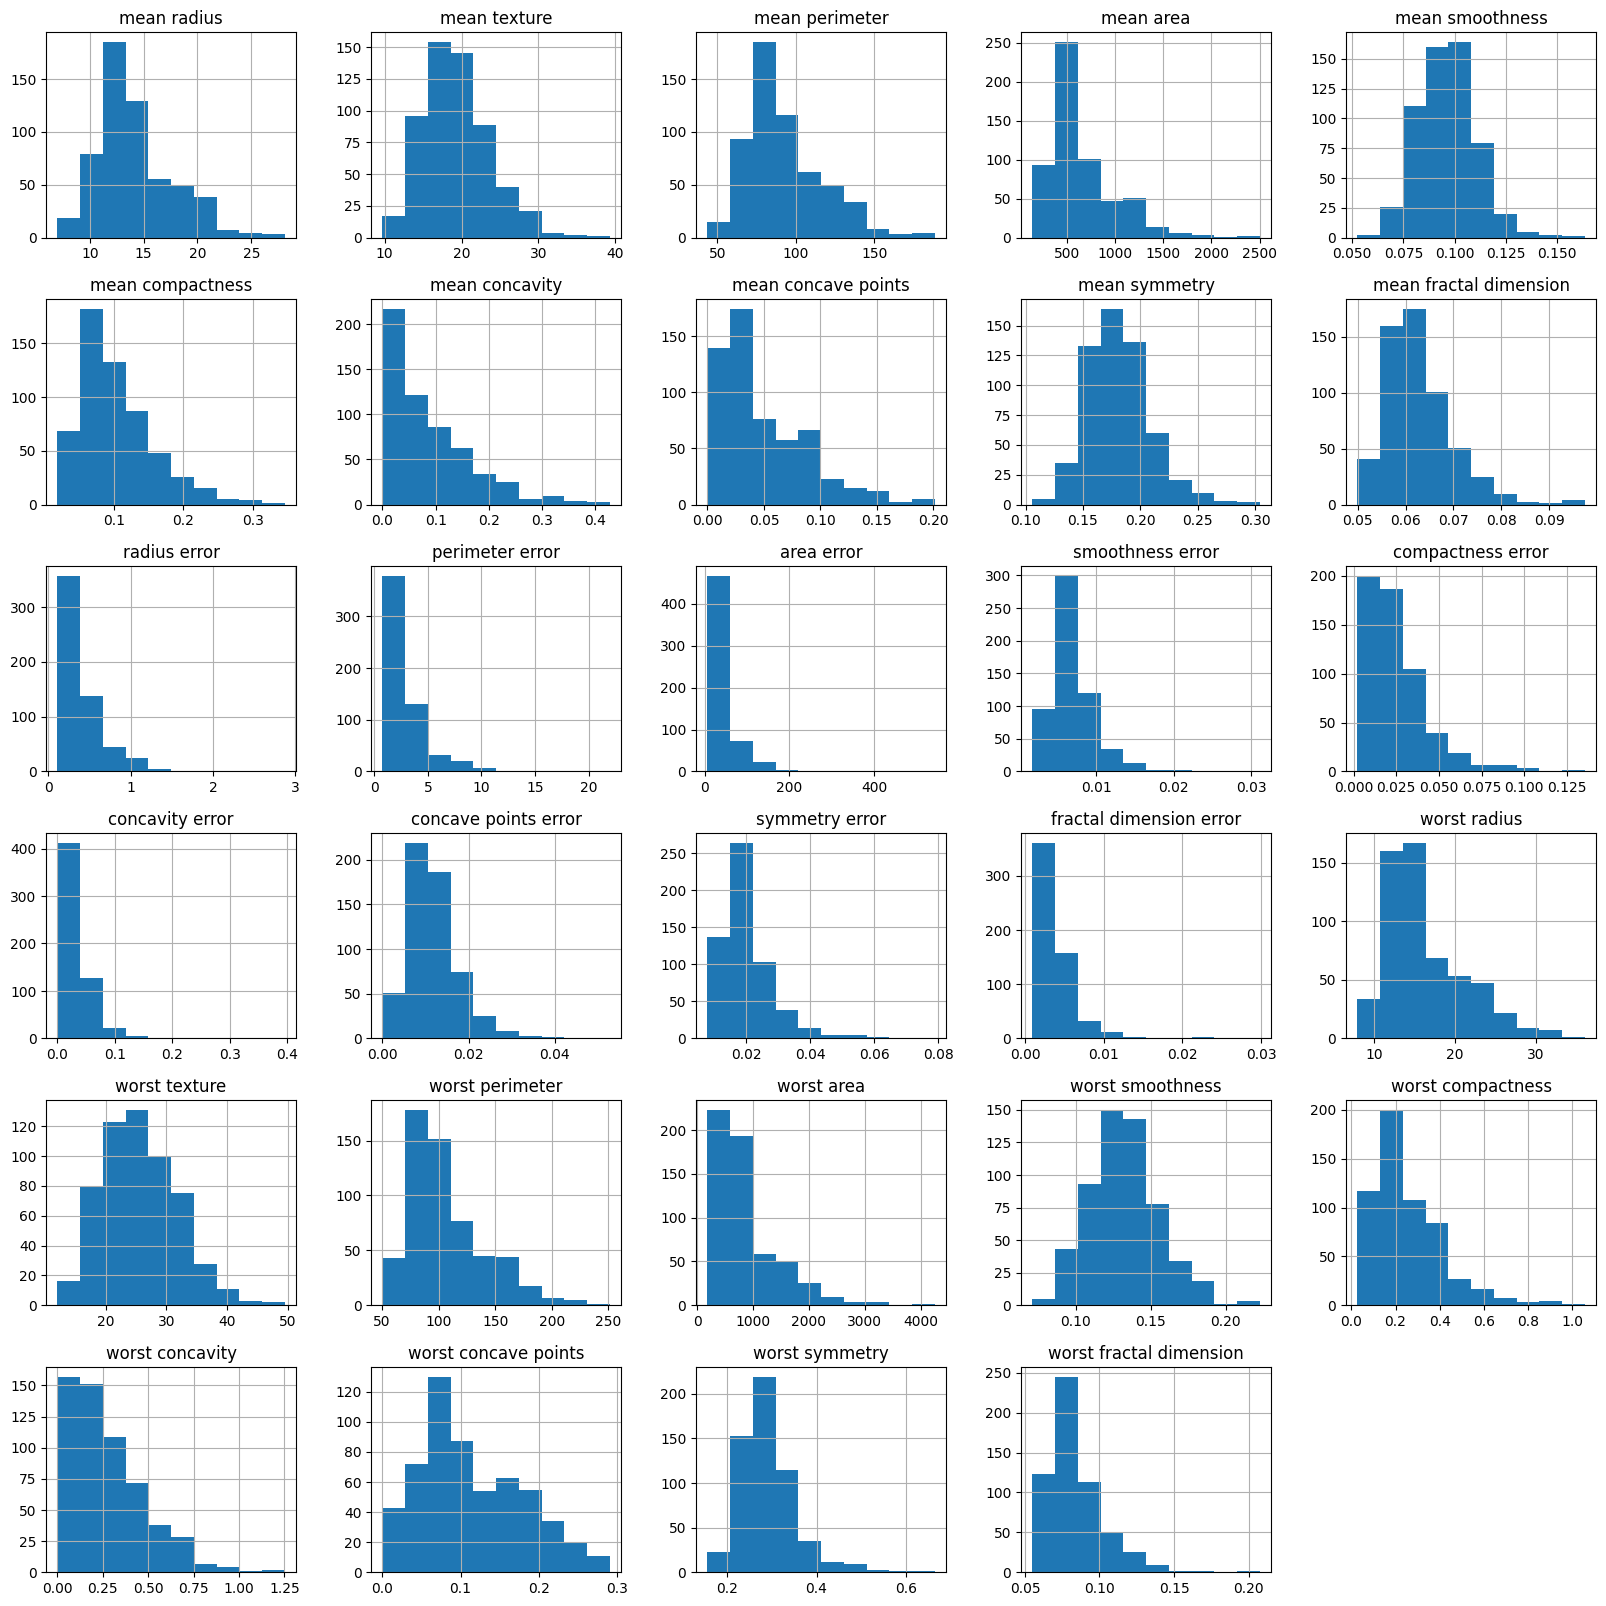

In [ ]:
# plt.figure()
X.hist(figsize=(20,20)); # we use hist to show distribution of continous numeric variables
# plt.show()

## Skewness handling

## sclaing the dataset
note : look at the plots . all distributions are in range 0,1

array([[<Axes: title={'center': 'mean radius'}>,
        <Axes: title={'center': 'mean texture'}>,
        <Axes: title={'center': 'mean perimeter'}>,
        <Axes: title={'center': 'mean area'}>,
        <Axes: title={'center': 'mean smoothness'}>],
       [<Axes: title={'center': 'mean compactness'}>,
        <Axes: title={'center': 'mean concavity'}>,
        <Axes: title={'center': 'mean concave points'}>,
        <Axes: title={'center': 'mean symmetry'}>,
        <Axes: title={'center': 'mean fractal dimension'}>],
       [<Axes: title={'center': 'radius error'}>,
        <Axes: title={'center': 'perimeter error'}>,
        <Axes: title={'center': 'area error'}>,
        <Axes: title={'center': 'smoothness error'}>,
        <Axes: title={'center': 'compactness error'}>],
       [<Axes: title={'center': 'concavity error'}>,
        <Axes: title={'center': 'concave points error'}>,
        <Axes: title={'center': 'symmetry error'}>,
        <Axes: title={'center': 'fractal dimensio

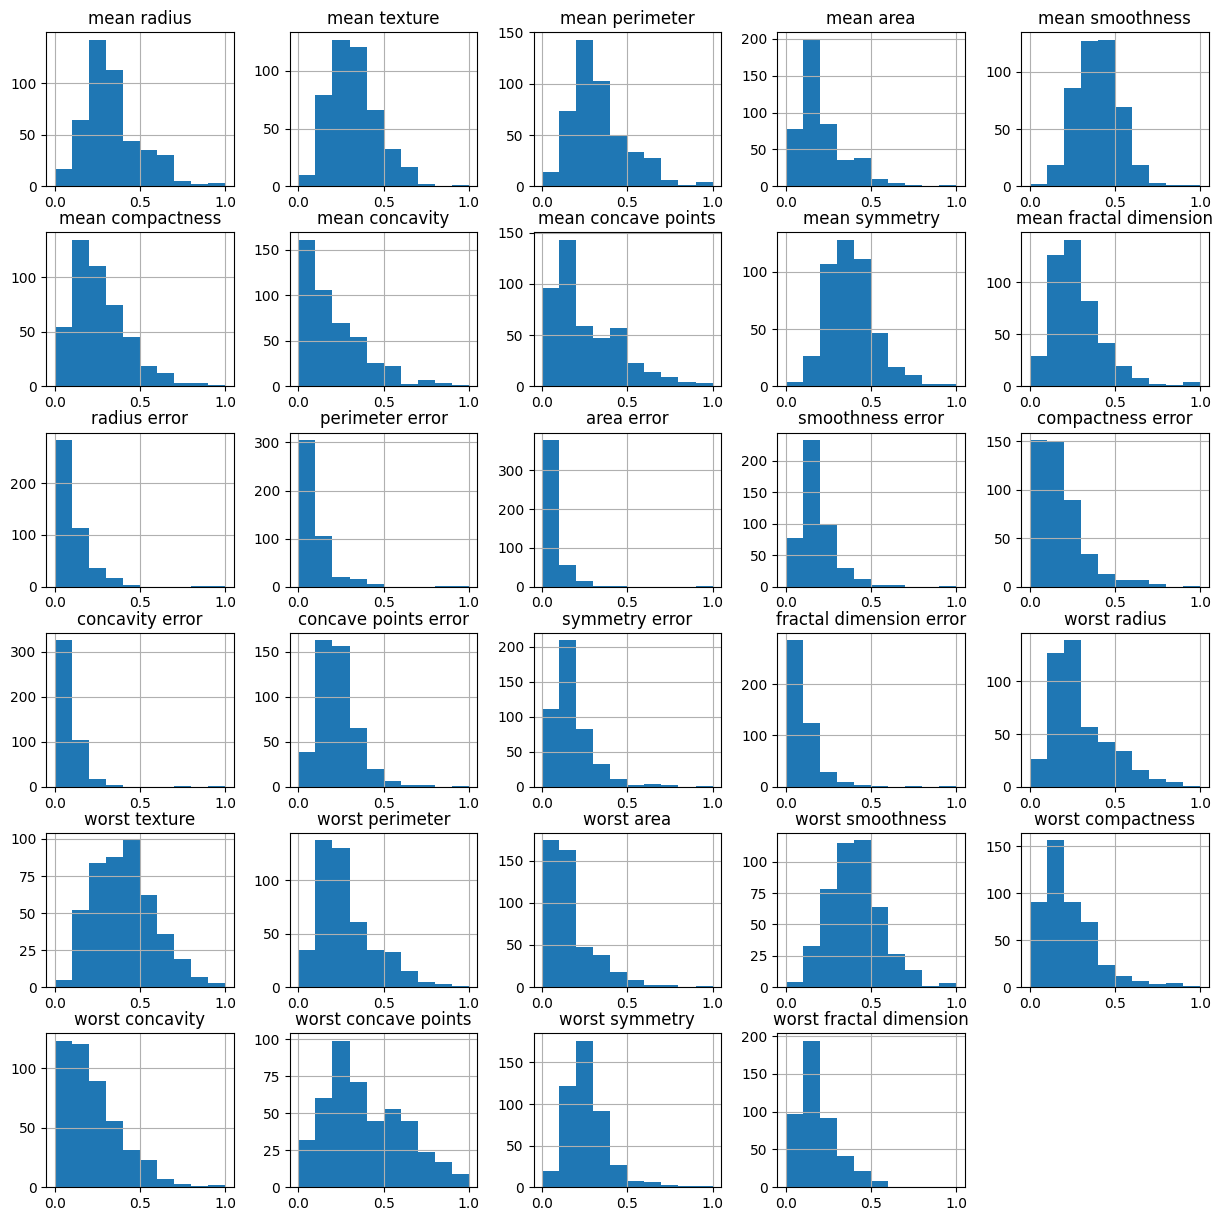

In [ ]:
# train test split
X_train, X_test, y_train, y_test= train_test_split (X,y , test_size=.2)
mms = MinMaxScaler()
mms.fit(X_train)
X_train = mms.transform(X_train)
X_test =mms.transform(X_test)

#now look at this
pd.DataFrame(X_train , columns = X.columns).hist(figsize=(15,15))


## fitting the model

In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred  = lr.predict(X_test)

## y test VS y pred

In [ ]:
# y_te = pd.DataFrame(y_test , columns=['y_test'] )
y_pr = pd.DataFrame(y_pred ,columns=['y_pred'])
pd.concat([y_test.reset_index(drop=True) , y_pr] , axis=1) # why di we using reset_index() ? indices are not regular unlike the y_predict

,texture error,y_pred
0,1.1930,1.013214
1,1.4670,1.643723
2,1.0010,1.246105
3,0.8927,1.384207
4,2.1050,1.750327
...,...,...
109,0.6336,1.274508
110,0.7732,0.627678
111,0.7656,0.758723
112,1.2170,1.297679


### Evaluate the model

In [ ]:
mean_squared_error(y_test , y_pred) , r2_score(y_test , y_pred)

(0.06948045583759409, 0.7288625032100191)

## convert Linear Regression to polynomial linear regression
note : polynomial regression has got a hyperparameter (features degree)

In [ ]:
# these are created after spliting : X_train , X_test , y_train , y_test

poly = PolynomialFeatures(degree = 2)
X_train = poly.fit_transform(X_train) # = fit , transform
X_test = poly.transform(X_test)

# now we generated new features -> so these are should scale
mms = MinMaxScaler()
mms.fit(X_train)
X_train = mms.transform(X_train)
X_test =mms.transform(X_test)

# fitting the model
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred  = lr.predict(X_test)

In [ ]:
mean_squared_error(y_test , y_pred) , r2_score(y_test , y_pred)

(15.577221157310728, -59.78786761862171)